<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/NN_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-16-1284176126.py:56: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipython-input-16-1284176126.py:57: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipython-input-16-1284176126.py:58: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



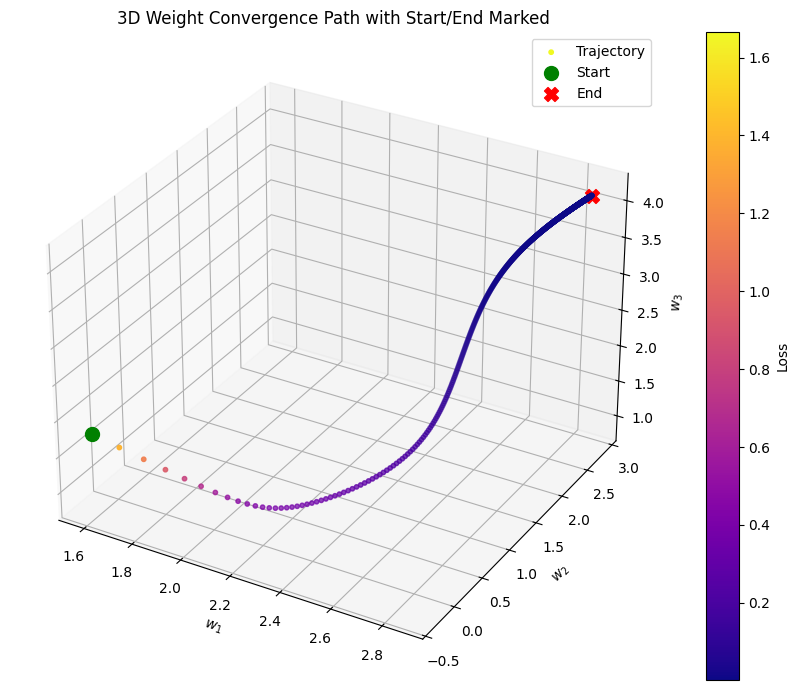

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Activation and loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

# Init weights
np.random.seed(42)
w1, w2, w3 = np.random.randn(3) * 3
b1, b2 = -4.5, 0.0
lr = 0.2

# Traces
w1_trace, w2_trace, w3_trace, loss_trace = [], [], [], []

# Training loop
for epoch in range(1000):
    dw1 = dw2 = db1 = dw3 = db2 = 0
    total_loss = 0
    for x, y in zip(X, Y):
        x1, x2 = x
        h = w1 * x1 + w2 * x2 + b1
        z = w3 * h + b2
        y_hat = sigmoid(z)
        total_loss += binary_cross_entropy(y, y_hat)
        dz = y_hat - y
        dw3 += dz * h
        db2 += dz
        dh = dz * w3
        dw1 += dh * x1
        dw2 += dh * x2
        db1 += dh

    # Avg grads
    dw1 /= 4; dw2 /= 4; db1 /= 4
    dw3 /= 4; db2 /= 4

    # Update
    w1 -= lr * dw1
    w2 -= lr * dw2
    w3 -= lr * dw3
    b1 -= lr * db1
    b2 -= lr * db2

    # Record
    w1_trace.append(float(w1))
    w2_trace.append(float(w2))
    w3_trace.append(float(w3))
    loss_trace.append(total_loss / 4)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot weight path
points = ax.scatter(w1_trace, w2_trace, w3_trace, c=loss_trace, cmap='plasma', s=10, label='Trajectory')

# Markers
ax.scatter(w1_trace[0], w2_trace[0], w3_trace[0], c='green', s=100, marker='o', label='Start')
ax.scatter(w1_trace[-1], w2_trace[-1], w3_trace[-1], c='red', s=100, marker='X', label='End')

# Labels
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('$w_3$')
ax.set_title('3D Weight Convergence Path with Start/End Marked')
fig.colorbar(points, ax=ax, label='Loss')
ax.legend()
plt.tight_layout()
plt.show()


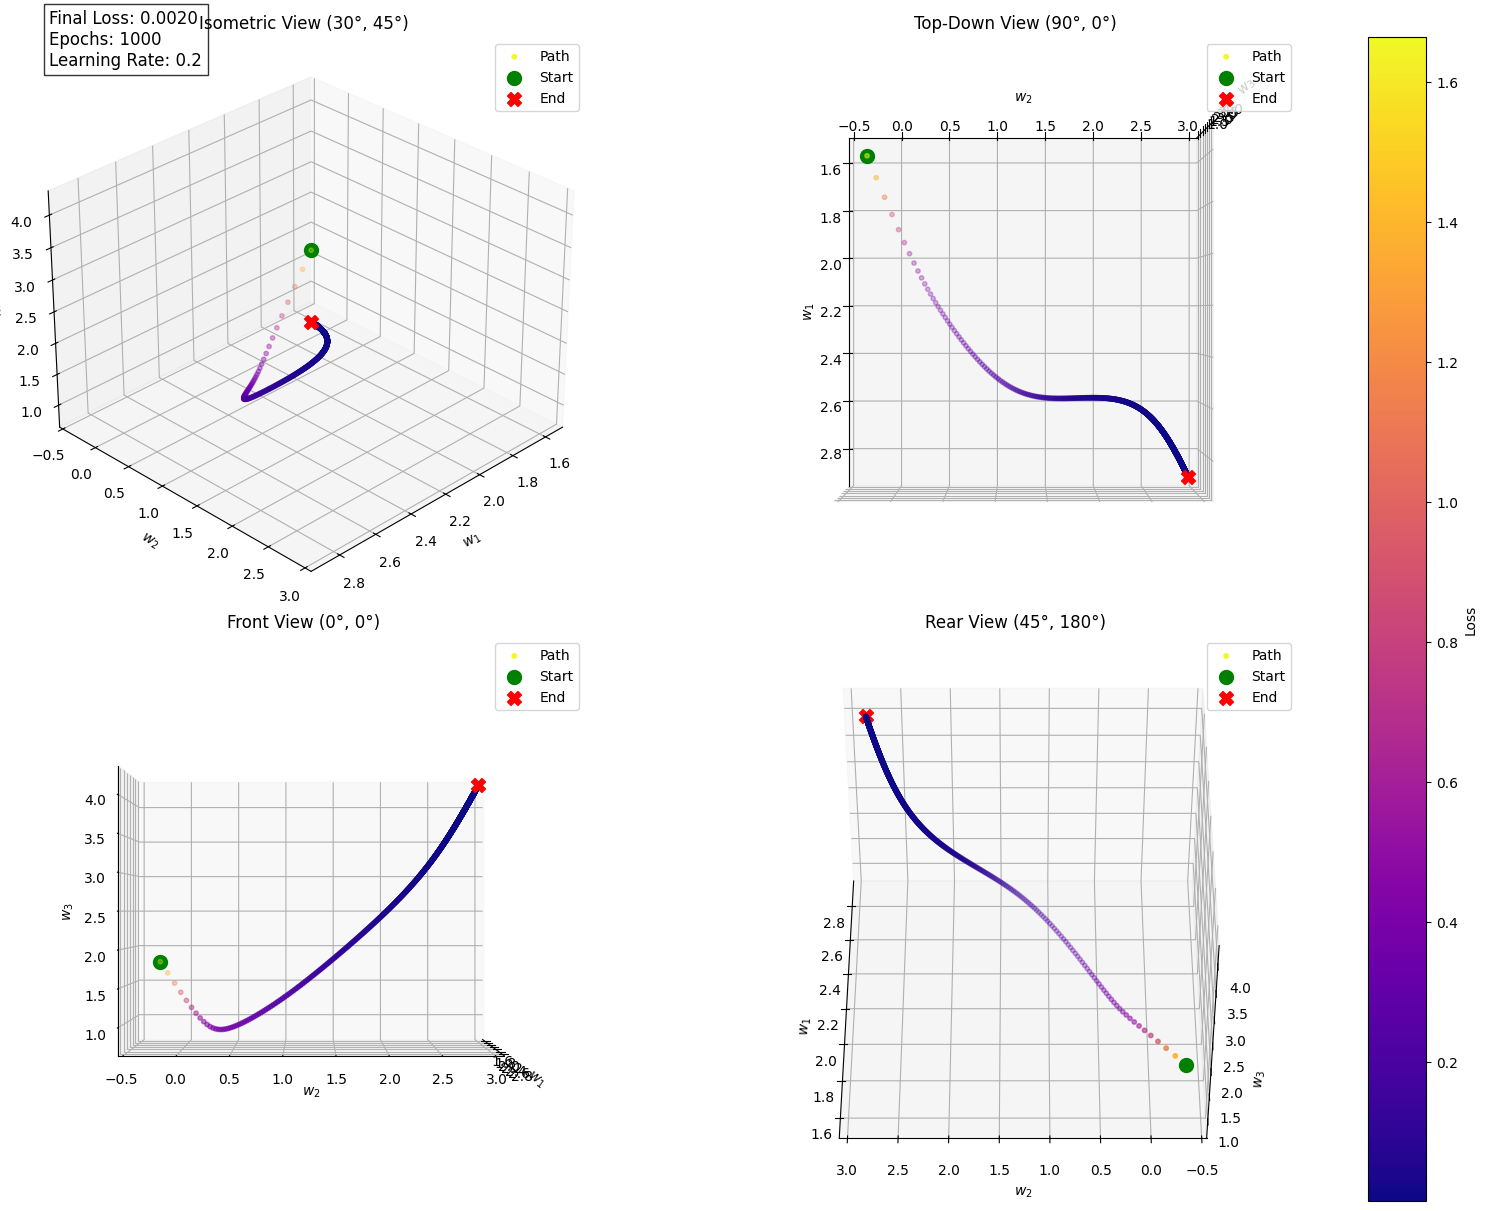

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Activation and loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    y_true = float(y_true)
    y_pred = float(np.clip(y_pred, 1e-8, 1 - 1e-8))
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

# Init weights
np.random.seed(42)
w1, w2, w3 = np.random.randn(3) * 3
b1, b2 = -4.5, 0.0
lr = 0.2
epochs = 1000

# Traces
w1_trace, w2_trace, w3_trace, loss_trace = [], [], [], []

# Training loop
for epoch in range(epochs):
    dw1 = dw2 = db1 = dw3 = db2 = 0
    total_loss = 0
    for x, y in zip(X, Y):
        x1, x2 = x
        y = float(y[0])
        h = w1 * x1 + w2 * x2 + b1
        z = w3 * h + b2
        y_hat = sigmoid(z)
        total_loss += binary_cross_entropy(y, y_hat)
        dz = y_hat - y
        dw3 += dz * h
        db2 += dz
        dh = dz * w3
        dw1 += dh * x1
        dw2 += dh * x2
        db1 += dh

    # Avg grads
    dw1 /= 4; dw2 /= 4; db1 /= 4
    dw3 /= 4; db2 /= 4

    # Update
    w1 -= lr * dw1
    w2 -= lr * dw2
    w3 -= lr * dw3
    b1 -= lr * db1
    b2 -= lr * db2

    # Record
    w1_trace.append(w1)
    w2_trace.append(w2)
    w3_trace.append(w3)
    loss_trace.append(total_loss / 4)

# --- Plotting from Multiple Views with Stats ---
fig = plt.figure(figsize=(16, 12), constrained_layout=True)

views = [
    (30, 45),   # Isometric
    (90, 0),    # Top-down
    (0, 0),     # Front
    (45, 180)   # Rear
]

titles = [
    "Isometric View (30°, 45°)",
    "Top-Down View (90°, 0°)",
    "Front View (0°, 0°)",
    "Rear View (45°, 180°)"
]

final_loss = loss_trace[-1]

for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # Color-coded trajectory
    p = ax.scatter(w1_trace, w2_trace, w3_trace, c=loss_trace, cmap='plasma', s=10, label='Path')

    # Start and End points
    ax.scatter(w1_trace[0], w2_trace[0], w3_trace[0], c='green', s=100, marker='o', label='Start')
    ax.scatter(w1_trace[-1], w2_trace[-1], w3_trace[-1], c='red', s=100, marker='X', label='End')

    # Labels
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    ax.set_zlabel('$w_3$')
    ax.set_title(titles[i])
    ax.view_init(elev=elev, azim=azim)
    ax.legend()

    # Annotate stats
    if i == 0:
        stats_text = f"Final Loss: {final_loss:.4f}\nEpochs: {epochs}\nLearning Rate: {lr}"
        ax.text2D(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

fig.colorbar(p, ax=fig.get_axes(), label='Loss')
plt.show()
